# TP1 - partie 3

Dans cette troisième et dernière partie du TP1 nous allons introduire l'utilisation de la bibliothèque NetworkX.

## D'abord prendre en main les basiques

Pour cela vous allez suivre le tutoriel NetworkX :

- https://networkx.github.io/documentation/stable/tutorial.html# jusqu'à la section 'Accessing edges and neighbors' comprise
- puis la section 'Drawing graphs'

Pour réaliser vos tests, vous pourrez ajouter des cellules ci-dessous (raccourci clavier 'b'). 

In [2]:
import networkx as nx

## Et maintenant on met en œuvre

Construisez le graphe suivant :

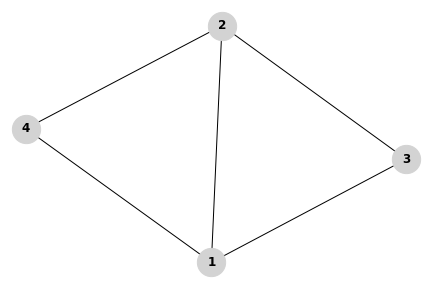

In [6]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,2)])

On peut visualiser le graphe grâce à `matplotlib`et la fonction `draw`. Ici on a de plus configuré l'affichage pour que les étiquettes des sommets soient affichées, la taille des sommets soit de 800, la couleur de fond des sommets gris clair. Si on effectue l'affichage en dehors d'un notebook, il ne faut pas oublier l'instruction `plt.show()`.

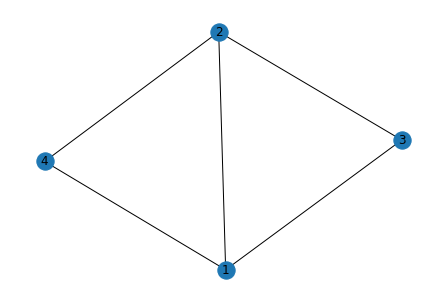

In [17]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

La documentation de NetworkX est divisée en sections. Il existe notamment :

- une section pour obtenir les méthodes [sur les sommets et les arêtes](https://networkx.github.io/documentation/stable/reference/functions.html),
- une section pour obtenir les [algorithmes disponibles](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) (à laquelle on s'intéressera plus tard).

Avec NetworkX, cherchez les méthodes pour obtenir les informations suivantes :

- le nombre de sommets du graphe
- le nombre d'arêtes du graphe
- le degré du sommet 1
- le degré du sommet 2
- les voisins du sommet 1

et expérimentez.

In [15]:
G.number_of_nodes()

4

In [16]:
G.number_of_edges()

5

In [18]:
G.degree(1)

3

In [21]:
G.degree(2)

3

In [25]:
for i in G.neighbors(1): print(i)

2
3
4


NetworkX permet de construire des graphes de différents façons. Une première manière de faire est d'ajouter des sommets à un graphe, puis de relier les sommets par des arêtes, comme cela a été fait plus haut.

Une seconde manière est de créer le graphe directement à partir d'une liste d'arêtes, cela crée implicitement les sommets. Si les noms des sommets sont donnés par des chaînes de caractères, cela fonctionne aussi :

In [26]:
h = nx.Graph([('Paul','Jacques'),('Paul','Maryse')])

 mais les sommets de degré 0 ne peuvent être ajoutés directement, il faut le faire dans une seconde étape :

In [27]:
h.add_node('Séverine')

Ecrire une fonction `degre_max` qui calcule le degré du sommet de degré le plus grand étant donné un graphe NetworkX.

In [38]:
def degre_max(g):
    assert isinstance(g,nx.classes.graph.Graph)
    x = 0
    for i in g :
        if g.degree(i) > x :
            x = g.degree(i)
            
    return x
        

In [39]:
degre_max(h)

2

Ecrire un prédicat `est_complet` qui vérifie qu'un graphe est complet. On pourra vérifier son prédicat en comparant le résultat au prédicat NetworkX permettant de tester cela et en utilisant les [fonctions de NetworkX permettant de générer des graphes](https://networkx.github.io/documentation/stable/reference/generators.html#module-networkx.generators.classic)

In [86]:
def est_complet(g):
    assert isinstance(g,nx.classes.graph.Graph)
    n = g.number_of_nodes()
    return g.number_of_edges() == (n*(n-1)//2)

Trouver le prédicat NetwokX permettant de tester l'isomorphisme de deux graphes. Puis créer trois graphes dont deux sont isomorphes et vérifier.

In [87]:
est_complet(h)

False

## Un petit problème pour terminer 

Créer le graphe (qu'on nommera `amis`) permettant de représenter les relations d'amitiés suivantes : Henri, Jacqueline, Roger sont amis avec Marcel, Jaqueline et Roger sont amis réciproques, Marcel est ami avec Bernadette et Jean, Bernadette est amie avec Henri et Anatole, Anatole est ami avec Marcel. Puis le dessiner (si les arêtes se croisent, posez-vous la question si il est possible de dessiner le graphe sans que les arêtes se croisent ? comment nomme-t-on cette propriété ?).

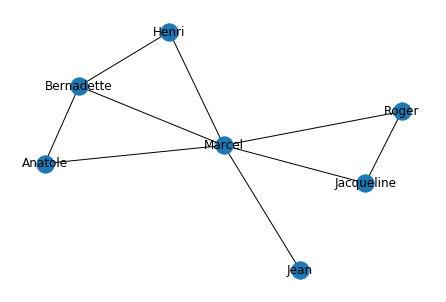

In [88]:
amis = nx.Graph([('Marcel','Henri'),('Marcel','Jacqueline'),('Marcel','Roger'),('Roger','Jacqueline'),('Jacqueline','Roger'),('Marcel','Bernadette'),('Marcel','Jean'),('Bernadette','Henri'),('Bernadette','Anatole'),('Marcel','Anatole')])
import matplotlib.pyplot as plt
nx.draw(amis, with_labels=True)
plt.show()

In [89]:
'Graphe Planaire'

'Graphe Planaire'

Qui a le plus d'amis ? (quelle propriété doit-on vérifier ?)

In [90]:
'Marcel a le plus de potes ! Sommet qui le plus grand degré'

'Marcel a le plus de potes ! Sommet qui le plus grand degré'

Calculer tous les amis des amis d'un membre quelconque du réseau d'amis :
- formuler le problème sous forme d'un problème dans un graphe,
- écrire le code Python permettant de répondre à la question (en utilisant NetworkX).